In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from hottbox.core import Tensor

[Return to Table of Contents](./0_Table_of_contents.ipynb)

# Tensors and basic operations

<img src="./imgs/tensors_dogs.jpg" alt="Drawing" style="width: 500px;"/>

A tensor is a multi-dimenaional array of data where each dimension is conventionally referred to as the **mode**. Tensor order is defined by the number of its modes which is equivivalent to the number of indices required to identify a particular entry of a multi-dimensional array. For ease of visualisation and compact notation, we consider a third order tensor $\mathbf{\underline{X}} \in \mathbb{R}^{I \times J \times K}$. Thus, an element of such a tensor, $\mathbf{\underline{X}} \in \mathbb{R}^{I \times J \times K}$, can be written in a general form as:

$$ x_{ijk} = \mathbf{\underline{X}}[i, j, k]$$

> **Note:** In order to be consistent with Python indexing, count of modes and elements within starts from zeros.

Creation of a tensor starts with a formation of a multidimensional array of data.

In [5]:
# Create 3-d array of data
array_3d = np.arange(24).reshape((2, 3, 4))

# Create tensor
tensor = Tensor(array_3d)

# Result preview
print(tensor)
tensor.data

This tensor is of order 3 and consists of 24 elements.
Sizes and names of its modes are (2, 3, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

## **Assigment 1**

1. Create a tensor of order 5 (of any shape) and with all its values equal to 5. Then, calculate its Frobenious norm. 
2. Construct several tensors of orders varying from 3 to 20, with the size of each dimension equal to 2. Plot the relation between an order of a tensor and the number of its elements.
3. Construct several tensors of order 3 with the size of each dimension varying from 3 to 15. Plot the relation between the size of dimensions of a tensor and the number of its elements.
4. Analyse and compare the so obtained graphs.

### Solution: Part 1

In [6]:
# Create a tensor
tensor = Tensor( 5*np.ones((2,2,2,2,2)) )
print(tensor)

This tensor is of order 5 and consists of 32 elements.
Sizes and names of its modes are (2, 2, 2, 2, 2) and ['mode-0', 'mode-1', 'mode-2', 'mode-3', 'mode-4'] respectively.


In [7]:
# Calculate Frobenious norm
print(tensor.frob_norm)

28.284271247461902


### Solution: Part 2

In [8]:
# Create tensors and collect information
tensor_order = range(3, 20+1)
number_of_elements = []

for order in tensor_order:
    number_of_elements.append( Tensor( np.zeros( tuple( 2*np.ones(order, dtype=int) ) ) ).size )
    
print('For a balanced tensor: number of elements = (size of each dimension) ^ (order of tensor)')

For a balanced tensor: number of elements = (size of each dimension) ^ (order of tensor)


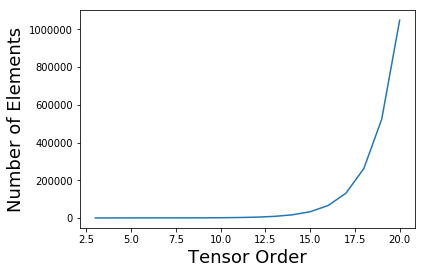

In [9]:
# Plot results
plt.figure()
plt.plot(tensor_order, number_of_elements)
plt.xlabel('Tensor Order', fontsize=18)
plt.ylabel('Number of Elements', fontsize=18)
plt.show()

### Solution: Part 3

In [10]:
# Create tensors and collect information
size_of_dimension = range(3, 15+1)
number_of_elements = []

for size in size_of_dimension:
    number_of_elements.append( Tensor( np.zeros( (size, size, size) ) ).size )
    
print('For a balanced tensor: number of elements = (size of each dimension) ^ (order of tensor)')

For a balanced tensor: number of elements = (size of each dimension) ^ (order of tensor)


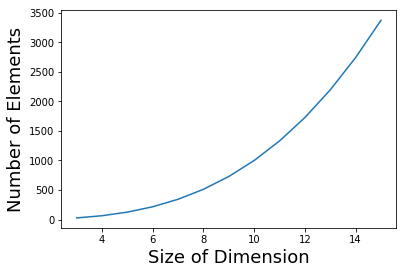

In [11]:
# Plot results
plt.figure()
plt.plot(size_of_dimension, number_of_elements)
plt.xlabel('Size of Dimension', fontsize=18)
plt.ylabel('Number of Elements', fontsize=18)
plt.show()

### Solution: Part 4

Under the assumption that a given tensor is balanced, i.e. the size of every dimension is equal, then the following relationship holds: a = b<sup>c</sup> where a is the number of elements, b is the size of each dimension and c is the order of the tensor. Clearly, the number of elements increases exponentially with the tensor order, also known as **the curse of dimensionality.**

# Most common tensor substructures
<img src="./imgs/tensor_substructures.png" alt="Drawing" style="width: 500px;"/>

1. A **fiber** is a vector obtained by fixing all but one of the indices, e.g.  $\mathbf{\underline{X}}[i,:,k]$ is the mode-2 fiber $\mathbf{\underline{X}}$ (usually refered to as row fiber). 

1. Fixing all but two of the indices yields a matrix called a **slice** of a tensor, e.g. $\mathbf{\underline{X}}[:,:,k]$ is the mode-[1,2] slice (usually refered to as the frontal slice).

**Note:** The same principles and definitions can be applied to a tensor of an arbitrarily large order. In addition, you can obtain a **subtensor** by fixing at least three indices and letting the remaining ones vary.

In [12]:
# Mode-2 fiber
tensor.data[0,1,:]

array([[[5., 5.],
        [5., 5.]],

       [[5., 5.],
        [5., 5.]]])

In [13]:
# Frontal slice
tensor.data[0,:,:]

array([[[[5., 5.],
         [5., 5.]],

        [[5., 5.],
         [5., 5.]]],


       [[[5., 5.],
         [5., 5.]],

        [[5., 5.],
         [5., 5.]]]])

## **Assigment 2**

1. Create a tensor of order 4 which consists of 81 elements and display all its horizontal slices and any five row fibers.
2. Create a tensor of order 3 and shape `(4,2,5)`, where the values of each consequent frontal slice are doubled.

### Solution: Part 1

In [14]:
# Create a tensor of order 4
tensor = Tensor( np.random.rand(3,3,3,3) )
print(tensor)

This tensor is of order 4 and consists of 81 elements.
Sizes and names of its modes are (3, 3, 3, 3) and ['mode-0', 'mode-1', 'mode-2', 'mode-3'] respectively.


In [15]:
# Display slices
# for every horizontal slice
for i in range(tensor.shape[0]):
    print(tensor.data[i,:,:])

[[[0.61326655 0.83446094 0.23069334]
  [0.3761192  0.7283264  0.0950039 ]
  [0.45537977 0.27453982 0.59693665]]

 [[0.94821305 0.12145749 0.91111262]
  [0.32088167 0.20306732 0.59103762]
  [0.72217129 0.13361029 0.8760671 ]]

 [[0.35590241 0.2711557  0.45880086]
  [0.70021995 0.22716824 0.127501  ]
  [0.85371004 0.15982248 0.67130197]]]
[[[0.49445182 0.21263217 0.86055151]
  [0.61523663 0.51837502 0.65019646]
  [0.8332913  0.18064698 0.38371865]]

 [[0.10189754 0.80551174 0.72662378]
  [0.82729352 0.06095103 0.65324084]
  [0.01104251 0.65331574 0.74592425]]

 [[0.1597787  0.13885834 0.75287385]
  [0.76382603 0.21587478 0.2168245 ]
  [0.91384634 0.5618749  0.4892504 ]]]
[[[0.25149359 0.35681176 0.02526515]
  [0.46016302 0.06659583 0.93846849]
  [0.64394747 0.34926809 0.12897167]]

 [[0.0911777  0.17330717 0.07806896]
  [0.22388326 0.78049536 0.39374176]
  [0.94791352 0.06224875 0.90920275]]

 [[0.12190241 0.56966556 0.58110985]
  [0.82965014 0.80501483 0.34945634]
  [0.72042789 0.874569

In [16]:
# Display fibers
for i in range(tensor.shape[0]):
    print(tensor.data[i,:,0])
    
for i in range(tensor.shape[0]-1):
    print(tensor.data[i,:,1])

[[0.61326655 0.83446094 0.23069334]
 [0.94821305 0.12145749 0.91111262]
 [0.35590241 0.2711557  0.45880086]]
[[0.49445182 0.21263217 0.86055151]
 [0.10189754 0.80551174 0.72662378]
 [0.1597787  0.13885834 0.75287385]]
[[0.25149359 0.35681176 0.02526515]
 [0.0911777  0.17330717 0.07806896]
 [0.12190241 0.56966556 0.58110985]]
[[0.3761192  0.7283264  0.0950039 ]
 [0.32088167 0.20306732 0.59103762]
 [0.70021995 0.22716824 0.127501  ]]
[[0.61523663 0.51837502 0.65019646]
 [0.82729352 0.06095103 0.65324084]
 [0.76382603 0.21587478 0.2168245 ]]


### Solution: Part 2

In [17]:
# Create a tensor of order 3
tensor = Tensor( np.ones((4,2,5)) )

# for every frontal slice
for i in range(1, tensor.shape[2]):
    tensor.data[:,:,i] = 2*tensor.data[:,:,i-1]

print(tensor)
print(tensor.data)

This tensor is of order 3 and consists of 40 elements.
Sizes and names of its modes are (4, 2, 5) and ['mode-0', 'mode-1', 'mode-2'] respectively.
[[[ 1.  2.  4.  8. 16.]
  [ 1.  2.  4.  8. 16.]]

 [[ 1.  2.  4.  8. 16.]
  [ 1.  2.  4.  8. 16.]]

 [[ 1.  2.  4.  8. 16.]
  [ 1.  2.  4.  8. 16.]]

 [[ 1.  2.  4.  8. 16.]
  [ 1.  2.  4.  8. 16.]]]


# Unfolding

Conventionally, unfolding is considered to be a process of element mapping from a tensor to a matrix. In other words, it arranges the mode-$n$ fibers of a tensor to be the matrix columns. Thus, the mode-$n$ unfolding is denoted as:

$$\mathbf{\underline{A}} \xrightarrow{n} \mathbf{A}_{(n)}$$

Thus, this operations requires to specify a mode along which a tensor will be unfolded. For a third order tensor, a visual representation of such operation is as following

<img src="./imgs/unfolding.png" alt="Drawing" style="width: 600px;"/>

In `hottbox` this functionality is available through the corresponding methods of the `Tensor` object, for instance:

In [18]:
# Create 3-d array of data
array_3d = np.arange(24).reshape((2, 3, 4))

# Create tensor
tensor = Tensor(array_3d)

# Unfolding of a tensor
tensor.unfold(mode=0)

# Result preview
print(tensor)
tensor.data

This tensor is of order 2 and consists of 24 elements.
Sizes and names of its modes are (2, 12) and ['mode-0', 'mode-1_mode-2'] respectively.


array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])

## **Assigment 3**

1. Create a tensor, $\mathbf{\underline{A}}$, of order 4, in such a way that its version unfolded along the second mode would have sizes `(5,72)`, that is $\mathbf{A}_{(n)} \in  \mathbb{R}^{5 \times 72}$. Validate your results by displaying the unfolded tensor.

### Solution : Part 1

In [19]:
# Create a tensor
tensor = Tensor( np.arange( 360 ).reshape((2,5,6,6)) )

print(tensor)

tensor.unfold(mode=1)

This tensor is of order 4 and consists of 360 elements.
Sizes and names of its modes are (2, 5, 6, 6) and ['mode-0', 'mode-1', 'mode-2', 'mode-3'] respectively.


This tensor is of order 2 and consists of 360 elements.
Sizes and names of its modes are (5, 72) and ['mode-1', 'mode-0_mode-2_mode-3'] respectively.

In [20]:
# Display unfolded version
print(tensor)
print(tensor.data)

This tensor is of order 2 and consists of 360 elements.
Sizes and names of its modes are (5, 72) and ['mode-1', 'mode-0_mode-2_mode-3'] respectively.
[[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
   18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
  198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215]
 [ 36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
   54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
  234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251]
 [ 72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
   90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
  252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
  270 271 272 273 274 275 276 277 

# Mode-n product 
<img src="./imgs/mode_n_product.png" alt="Drawing" style="width: 600px;"/>

The mode-$n$ product is a multiplication of a tensor  by a matrix along the $n^{th}$ mode of a tensor. This essentially means that each mode-$n$ fiber should be multiplied by this matrix. Mathematically, this can be expressed as:

$$\mathbf{\underline{X}} \times_n \mathbf{A} = \mathbf{\underline{Y}} \quad \Leftrightarrow  \quad \mathbf{Y}_{(n)} = \mathbf{A} \mathbf{X}_{(n)}  $$

In [21]:
I, J, K = 2, 3, 4
J_new = 5

# Create tensor
array_3d = np.arange(I * J * K).reshape(I, J ,K)
X = Tensor(array_3d)

# Create matrix
A = np.arange(J_new * J).reshape(J_new, J)

# Performs Mode-n product 
Y = X.mode_n_product(A, mode=1, inplace=False)

# Preview of resulting tensor
print(Y)

# Preview of its unfolded version
Y.unfold(mode=1, inplace=False).data

This tensor is of order 3 and consists of 40 elements.
Sizes and names of its modes are (2, 5, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[ 20,  23,  26,  29,  56,  59,  62,  65],
       [ 56,  68,  80,  92, 200, 212, 224, 236],
       [ 92, 113, 134, 155, 344, 365, 386, 407],
       [128, 158, 188, 218, 488, 518, 548, 578],
       [164, 203, 242, 281, 632, 671, 710, 749]])

## **Assignment 4**

1. Perform the mode-$n$ product of a 3-rd order tensor, $\mathbf{\underline{X}}$, with a matrix, $\mathbf{A} \in  \mathbb{R}^{5 \times 4}$, provided that the resulting tensor, $\mathbf{\underline{Y}}$, consists of `100` elements. Validate your results. 

> **Note:** You are encouraged to experiment with the optional parameter `inplace` and to investigate its effect on the result.

### Solution: Part 1

In [22]:
# Create original tensor 
I, J, K = 2, 5, 5
tensor = Tensor( np.arange(I * J * K).reshape((I, J, K)) )

In [23]:
# Create matrix
matrix = np.ones((10, J))

In [24]:
# Perform mode-n product 
tensor.mode_n_product(matrix, mode=1, inplace=True)
print(tensor)

This tensor is of order 3 and consists of 100 elements.
Sizes and names of its modes are (2, 10, 5) and ['mode-0', 'mode-1', 'mode-2'] respectively.


In [23]:
# Validate equivalence between the left and right hand side


# Properties of mode-n product

1. For distinct modes in a series of multiplications, the order of the multiplication is irrelevent: 

    $$\mathbf{\underline{X}} \times_n \mathbf{A} \times_m \mathbf{B} = \mathbf{\underline{X}} \times_m \mathbf{B} \times_n \mathbf{A} \quad (m \neq n)$$

1. However, this does not hold if the modes are the same :

    $$\mathbf{\underline{X}} \times_n \mathbf{A} \times_n \mathbf{B} = \mathbf{\underline{X}} \times_n (\mathbf{B}\mathbf{A})$$

## **Assignment 5**

1. Validate both of the above properties empirically 
2. Prove the second property analytically

> **Note:** Be aware of consequences of the optional parameter `inplace` (its default value is set to `True`).

### Solution: Part 1

In [24]:
# Create tensor
tensor = Tensor( np.arange(125).reshape((5,5,5)) )

In [37]:
# Create matrices
A = np.ones((5,5))
B = np.arange(25).reshape((5,5))

In [38]:
# Validate property 1
lhs = tensor.mode_n_product(A, mode=0, inplace=False).mode_n_product(B, mode=1, inplace=False)
rhs = tensor.mode_n_product(B, mode=1, inplace=False).mode_n_product(A, mode=0, inplace=False)

lhs == rhs

True

In [39]:
# Validate property 2
lhs = tensor.mode_n_product(A, mode=0, inplace=False).mode_n_product(B, mode=0, inplace=False)
rhs = tensor.mode_n_product(B, mode=0, inplace=False).mode_n_product(A, mode=0, inplace=False)

lhs == rhs

False

### Solution: Part 2

Use [LaTeX syntax](https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook) for analytical deriviations for the second property below.


In [49]:
%%latex

Let 
$$\mathbf{\underline{X}} \in  \mathbb{R}^{I_1 \times I_2 \times ... \times I_n \times ... \times I_N}$$ 
$$\mathbf{A} \in  \mathbb{R}^{I_A \times I_n}$$
$$\mathbf{B} \in  \mathbb{R}^{I_B \times I_A}$$

Consider dimensions of LHS
$$ \mathbf{\underline{X}} \times_n \mathbf{A} \in  \mathbb{R}^{I_1 \times I_2 \times ... \times I_A \times ... \times I_N}$$
$$ \mathbf{\underline{X}} \times_n \mathbf{A} \times_n \mathbf{B} \in  \mathbb{R}^{I_1 \times I_2 \times ... \times I_B \times ... \times I_N}$$

Consider dimension of RHS
$$ (\mathbf{B}\mathbf{A}) \in \mathbb{R}^{I_B \times I_n}$$
$$ \mathbf{\underline{X}} \times_n (\mathbf{B}\mathbf{A}) \in  \mathbb{R}^{I_1 \times I_2 \times ... \times I_B \times ... \times I_N}$$

The dimensions of both sides agree.

<IPython.core.display.Latex object>